MACS 40400 Final Project Seuxalization of Popular Music by Jasmine Huang

“Ah, music," he said, wiping his eyes. "A magic beyond all we do here!”
-- J.K. Rowling, Harry Potter and the Sorcerer's Stone

Music plays an important role in our life. It is one of the most consumed cultural artifacts of modern time. However, critics, educators, parents and scholars alike have been increasingly critical about the ways popular media became infiltrated with hypersexualized and pornographic content (McRobbie, 2004; Hall et al., 2011). Content analysis of 600 Billboard Hot 100 year-end songs every decade from 1959 to 2009 has shown a significant increase of sexualization in popular music lyrics (Hall et al., 2011). In response to the growing concerns, the American Psychological Association (APA) Division 46 Society for Media Psychology & Technology established the Task Force on the Sexualization of Popular Music and published a report to review current research, policy and offer recommendations on this issue (2016). The report points out that exposure to sexualized music can have negative effects on adultescents sexual attitudes and is related to future risky sexual behaviors. It also shows that sexually objectifying media content increases self-objectification among girls which negatively impacts their body esteem, dieting patterns, anxiety and confidence in their math skills (Grabe & Hyde, 2009). Rap music, in particular, has a reputation for hyper-sexualizing women and perpetuating sexual violence against women (Weitzer& Kubrin, 2009; Wright & Rubin, 2017). Additionally, sexual objectification is linked to misogynistic beliefs which legitimize violence (van Oosten et al., 2015). Although many studies have examined the ways women are passively portrayed in media, how female creators and artists actively express themselves and react to the sexualized culture is seldom studied. In a content analysis of misogyny in rap music, Weitzer & Kubrin (2009) points out that female rappers offer little resistance to and even reinforce the gendered sexual stereotypes in hip hop. Yet the authors acknowledge that their sample size for female rappers is too small to draw definitive conclusions. A large-scale content analysis on popular music lyrics is needed to understand how the lyrical trends change over time for both male and female artists across genres. 

Do women participate in the hypersexualized culture or do they stand in an oppositional stance? Did popular music become more misogynistic as they become more sexualized? In what ways do female artists communicate their sexual attitudes in the lyrics and how do they differ from their male counterparts? While evidence suggests negative consequences of consuming sexualized media, some argue that portraying women as sexually powerful is a way to reclaim their sexual agency (Gill, 2003). Music as an expressive platform is a salient medium where these contradictory dual realities of oppression and empowerment co-exist. In this project, I will use computational and Peircean semiotic tools to analyze 4024 popular songs from Billboard’s Top 100 between the years 1950 – 2015. The original dataset is gathered by Kevin Schaich and the team. It is openly available on Github. With this dataset, I will demonstrate how the patterns of sexualization and misogyny in lyrics differ between genders, genres, and the changes over time. 

In Doing Cultural Studies, du Gay (2013) discusses two ways of defining culture – culture as a “whole way of life” and culture as “the production and circulation of meaning”. I will adopt the latter definition that culture is a circuit of creating and consuming meanings. Using Peircean semiotic tools that view the production of meanings as a triadic sign process between the object, sign vehicle and interpretant (Buchler, 1956), I will define culture as a legisign – the laws or conventionalized understandings that are agreed upon by a cultural group. Therefore, studying the culture of sexualization can be reduced to analyzing the aggregated effects of the individual replica of a legisign, which is each song’s lyric. 

To identify the patterns of sexualization in popular music lyrics, I will look at two closely related but distinct sign-vehicles - the sexual words and sexist slurs in music lyrics. I will demonstrate how the objects– the sexualization and misogyny in popular music – each belong to a conventionalized pattern (a legisign). The objects are the meanings that the signs stand for (Buchler, 1956), which, in my case, are the sexualization and misogyny in popular music. Here, I narrowly define sexualization as dehumanize and reduce someone to their sexuality, sex appeal, and sexualized body. I define misogyny as hatred, aggression, or other negative emotions towards women. The interpretant is that the lyrics of popular music are sexual (about sex) or are misogynistic (indicate negative attitudes towards women), respectively. I argue that both objects relate to the sign-vehicles symbolically, as the lyrics are collections of words that are arbitrary but carry on conventional meanings. The sign-vehicles relate to the interpretant dicentically because the interpretants are propositions. I will prove in my analysis that the signs are legisigns in that they are replicated and widely understood knowledge with a group. I will also demonstrate how the conventions of misogyny lyrics have changed and created a new legisign that shares a different object and interpretant.

In [1]:
import pandas as pd
import random
import numpy as np
import string
import re
import nltk
from gensim import corpora, models
import seaborn as sns
import matplotlib.pyplot as plt
import music
sns.set_theme(style="whitegrid")
%matplotlib inline

In [25]:
def no_lyric(lyric):
    if lyric.startswith("Unfortunately"):
        return True
    else:
        return False

In [29]:
music_df = pd.read_csv("data/music_hp_df.csv", index_col = 0)
music_df.loc[music_df['lyrics'].apply(lambda x: no_lyric(x))] #4 songs that don't have lyrics in the dataset

,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,time_signature,uri,analysis_url,artist_with_features,year_bin,image,cluster,Gender,tag,hiphop
4,"Unfortunately, we are not licensed to display ...",46.8,0.079,1950,6.0,69.79,32,3,All My Love,6.0,...,4,spotify:track:05sXHTLqIpwywbpui1JT4o,https://api.spotify.com/v1/audio-analysis/05sX...,NaN,1950s,https://i.scdn.co/image/353b05113b1a140d64d83d...,String Lover,female,"['country', 'pop']",False
1958,"Unfortunately, we are not licensed to display ...",46.8,0.079,1987,6.0,69.79,32,3,Causing A Commotion,6.0,...,4,spotify:track:3sX3c6QUPSAiKf77RZRf5B,https://api.spotify.com/v1/audio-analysis/3sX3...,NaN,1980s,https://i.scdn.co/image/19cf1c640fdaf39577fa07...,String Lover,female,"['american', 'américain', 'arabic', 'art pop',...",False
2299,"Unfortunately, we are not licensed to display ...",46.8,0.079,1992,6.0,69.79,32,3,This Used To Be My Playground,6.0,...,4,spotify:track:637V2ymBt4Ljlbz4EmRys8,https://api.spotify.com/v1/audio-analysis/637V...,NaN,1990s,https://i.scdn.co/image/19cf1c640fdaf39577fa07...,String Lover,female,"['american', 'américain', 'arabic', 'art pop',...",False
2433,"Unfortunately, we are not licensed to display ...",46.8,0.079,1994,6.0,69.79,32,3,I'll Remember,6.0,...,4,spotify:track:00U0pedRUMEzREpyRqbVT6,https://api.spotify.com/v1/audio-analysis/00U0...,NaN,1990s,https://i.scdn.co/image/19cf1c640fdaf39577fa07...,String Lover,female,"['american', 'américain', 'arabic', 'art pop',...",False


In [30]:
music_df.drop([4, 1958, 2299, 2433], inplace =True) #remove the 4 lyrics that are not found
music_df.reset_index(drop = True, inplace = True)
music_df.head(n=10)

,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,time_signature,uri,analysis_url,artist_with_features,year_bin,image,cluster,Gender,tag,hiphop
0,"Mona Lisa, Mona Lisa, men have named you\nYou'...",189.0,0.199,1950,5.2,88.74,145,17,Mona Lisa,2.9,...,3,spotify:track:3k5ycyXX5qsCjLd7R2vphp,https://api.spotify.com/v1/audio-analysis/3k5y...,NaN,1950s,https://i.scdn.co/image/a4c0918f13b67aa8d9f4ea...,String Lover,male,"['american', 'death by lung cancer', 'easy lis...",False
1,I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...,270.9,0.224,1950,4.4,82.31,189,31,I Wanna Be Loved,3.3,...,5,spotify:track:4UY81WrDU3jTROGaKuz4uZ,https://api.spotify.com/v1/audio-analysis/4UY8...,Gordon Jenkins,1950s,https://i.scdn.co/image/42e4dc3ab9b190056a1ca1...,String Lover,Group,['andrews sisters'],False
2,I was dancing with my darling to the Tennessee...,174.6,0.351,1950,5.2,88.74,138,16,Tennessee Waltz,2.9,...,3,spotify:track:6DKt9vMnMN0HmlnK3EAHRQ,https://api.spotify.com/v1/audio-analysis/6DKt...,NaN,1950s,https://i.scdn.co/image/353b05113b1a140d64d83d...,String Lover,female,"['country', 'pop']",False
3,Each time I hold someone new\nMy arms grow col...,135.9,0.231,1950,4.4,99.23,117,18,I'll Never Be Free,0.9,...,3,spotify:track:0KnD456yC5JuweN932Ems3,https://api.spotify.com/v1/audio-analysis/0KnD...,Kay Starr,1950s,https://i.scdn.co/image/4bd427bb9181914d0fa448...,String Lover,male,"['death by liver failure', 'spiritual']",False
4,"Hoop dee doo, hoop dee doo, \nI hear a polka ...",423.0,0.182,1950,4.8,106.67,382,54,Hoop-Dee-Doo,0.1,...,4,spotify:track:12WJhNxX6EYC2rAlfVOW4d,https://api.spotify.com/v1/audio-analysis/12WJ...,NaN,1950s,https://i.scdn.co/image/67994599f4a13b71c23e0f...,String Lover,male,"['adult contemporary', 'american', 'big band',...",False
5,i love those dear hearts and gentle people\nwh...,303.3,0.412,1950,4.4,90.77,239,39,Dear Hearts And Gentle People,2.1,...,3,spotify:track:1srbpc0A9FtPknqHZH0Ecv,https://api.spotify.com/v1/audio-analysis/1srb...,NaN,1950s,https://i.scdn.co/image/bce578f0f9138f68d8868b...,String Lover,male,"['american', 'christmas music', 'death by hear...",False
6,"My heart knows what the wild goose knows,\nI m...",350.1,0.081,1950,4.8,106.67,306,40,Cry Of The Wild Goose,0.1,...,4,spotify:track:4Gx5Hy6fnfeXcSEnVls6f3,https://api.spotify.com/v1/audio-analysis/4Gx5...,NaN,1950s,https://i.scdn.co/image/c3bbf9fc8bd35a89e42950...,String Lover,male,['death by heart failure'],False
7,They try to tell us we're too young\nToo young...,100.8,0.133,1951,4.8,106.67,92,13,Too Young,0.1,...,1,spotify:track:44ZAlAAn0bAEzUJgZky04H,https://api.spotify.com/v1/audio-analysis/44ZA...,NaN,1950s,https://i.scdn.co/image/a4c0918f13b67aa8d9f4ea...,String Lover,male,"['american', 'death by lung cancer', 'easy lis...",False
8,Because of you there's a song in my heart\nBec...,131.4,0.330,1951,4.8,89.75,101,13,Because Of You,2.5,...,4,spotify:track:1hVEHu6SemMvlYAP5MWkDj,https://api.spotify.com/v1/audio-analysis/1hVE...,k.d. lang,1950s,https://i.scdn.co/image/cdc8a7ef4d569d7519c127...,String Lover,male,"['american', 'jazz', 'pop']",False
9,"Come on-a my house, my house, I'm gonna give y...",317.7,0.020,1951,5.6,79.26,220,24,Come On-a My House,4.4,...,4,spotify:track:3GVyT9fBXuEkGs1STo2WHZ,https://api.spotify.com/v1/audio-analysis/3GVy...,NaN,1950s,https://i.scdn.co/image/5974256cb22557291dcc9c...,String Lover,female,"['american', 'jazz', 'pop', 'vocal jazz']",False


After an initial investigation, I removed 4 songs whose lyrics are not found in the original database. Because previous studies have shown that hip-hop/rap music frequently contains misogynistic and sexualized content (Weitzer& Kubrin, 2009; Wright & Rubin, 2017), I extracted genre information to single out songs that are tagged “hip-hop” or “rap” to compare hip-hop-specific trends with the general popular music trend. 

In [201]:
wc_dict = music.readDict('LIWC2007_English100131.dic')
def sexual(text, liwc_dict):
    '''
    Compute rel. percentage of LIWC 2007 'sexual' category:
    words like "horny", "love", "incest"
    '''
    
    liwc_counts = music.wordCount(text, liwc_dict)
    
    return liwc_counts[0]['sexual'] / liwc_counts[2]
def shehe(text, liwc_dict):
    '''
    Compute rel. percentage of LIWC 2007 3rd person singular
    '''
    liwc_counts = music.wordCount(text, liwc_dict)
    
    return liwc_counts[0]['shehe'] / liwc_counts[2]
def misogyny(text, misogyny_vocab):
    count = 0
    tokens = music.get_tokens(text)
    for token in tokens:
        if token in misogyny_vocab:
            count +=1
    return count/len(tokens)
#defines misogyny vocab as sexist slurs. Words used by previous research (Felmlee et al., 2019)
misogyny_vocab = ['bitch', 'bitches', 'ho', 'whore', 'whores', 'hoe', 'hoes', 'cunt']

def i(text, liwc_dict):
    '''
    Compute rel. percentage of LIWC 2007 first person singular
    '''
    liwc_counts = music.wordCount(text, liwc_dict)
    
    return liwc_counts[0]['i'] / liwc_counts[2]
def is_sexual(text, liwc_dict):
    '''
    determine whether a text contains any sexual words
    '''
    liwc_counts = music.wordCount(text, liwc_dict)
    if liwc_counts[0]['sexual'] != 0:
        return True
    else:
        return False

In [46]:
music_df['is_sexual'] = music_df.lyrics.apply(lambda x: is_sexual(x, wc_dict))

In [98]:
#percentage of songs that used sexual words
sum(music_df['is_sexual'])/len(music_df)

0.691351888667992

In [33]:
music_df['freq_sexual'] = music_df.lyrics.apply(lambda x: sexual(x, wc_dict))

In [34]:
music_df['freq_shehe'] = music_df.lyrics.apply(lambda x: shehe(x, wc_dict))

In [202]:
music_df['freq_misogyny'] = music_df.lyrics.apply(lambda x: misogyny(x, misogyny_vocab))

In [36]:
music_df['freq_i'] = music_df.lyrics.apply(lambda x: i(x, wc_dict))

In [203]:
music_df['is_misogyny'] = music_df['freq_misogyny'] != 0

In [207]:
#percentage of songs from 2010-2015 that used misogynistic words 
sum(music_df.loc[music_df['year_bin'] == "2010s"]['is_misogyny'])/len(music_df.loc[music_df['year_bin'] == "2010s"])

0.14743589743589744

In [208]:
hiphop = music_df.loc[music_df['hiphop']]

In [37]:
#globally set plot setting
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'lines.linewidth' : 4,
          'figure.figsize': (16, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

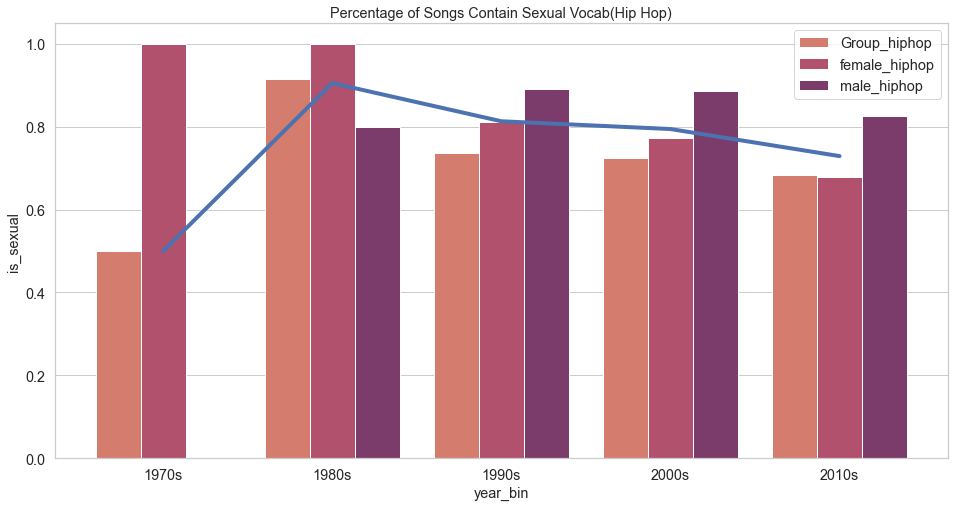

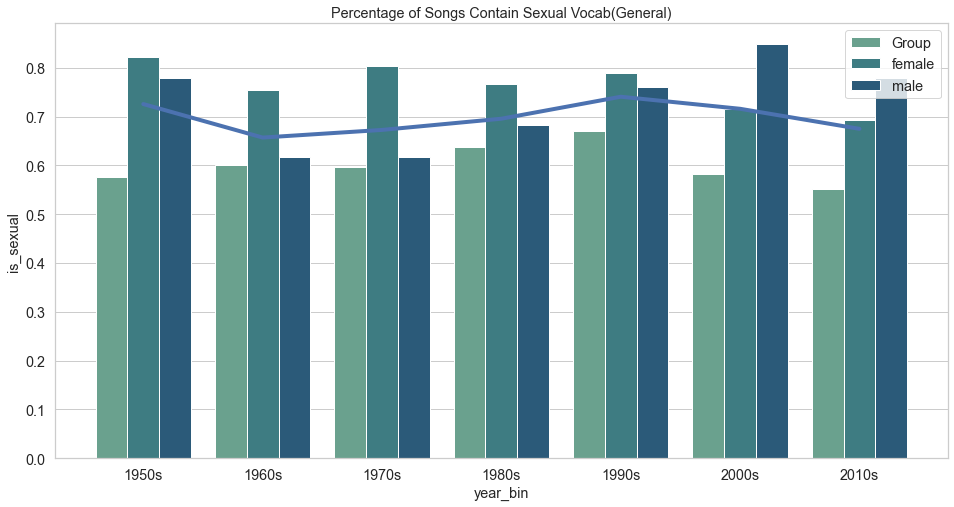

In [126]:
is_sexual_grouped = pd.DataFrame(music_df.groupby(['year_bin', 'Gender']).is_sexual.mean())
is_sexual_grouped.reset_index(inplace = True)
is_sexual_grouped_hiphop = pd.DataFrame(hiphop.groupby(['year_bin', 'Gender']).is_sexual.mean())
is_sexual_grouped_hiphop.reset_index(inplace = True)
is_sexual_grouped_hiphop['Gender'] = is_sexual_grouped_hiphop['Gender'].apply(lambda x: x + "_hiphop") 
year_mean = is_sexual_grouped.groupby('year_bin').mean()
year_mean_hiphop = is_sexual_grouped_hiphop.groupby('year_bin').mean()
year_mean_hiphop.reset_index().append(row_).sort_values(by = ['year_bin'])
sns.barplot(x = 'year_bin', y= 'is_sexual', hue = 'Gender', data = is_sexual_grouped_hiphop, palette = "flare").set_title("Percentage of Songs Contain Sexual Vocab(Hip Hop)")
sns.lineplot(x = 'year_bin', y = 'is_sexual', data = year_mean_hiphop)
plt.show()
sns.barplot(x = 'year_bin', y= 'is_sexual', hue = 'Gender', data = is_sexual_grouped,palette = "crest").set_title("Percentage of Songs Contain Sexual Vocab(General)")
sns.lineplot(x = 'year_bin', y = 'is_sexual', data = year_mean)
plt.show()

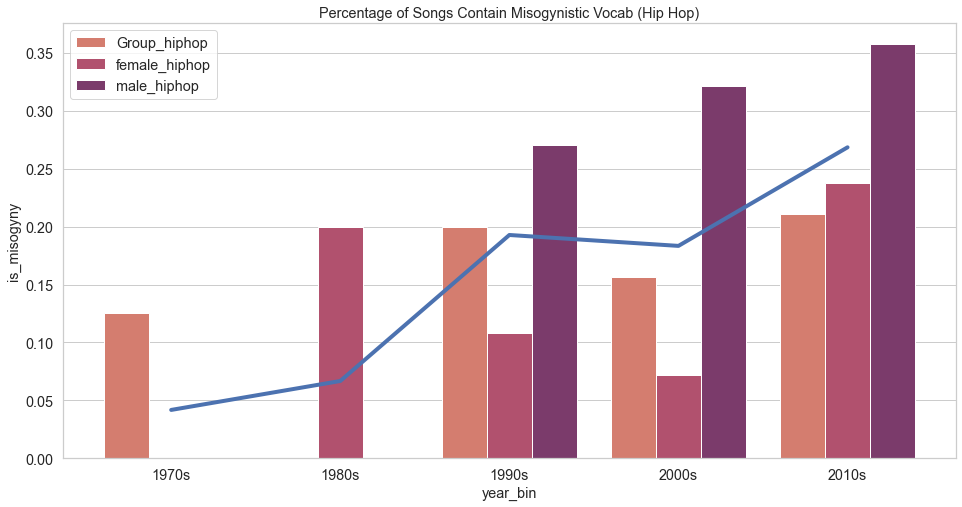

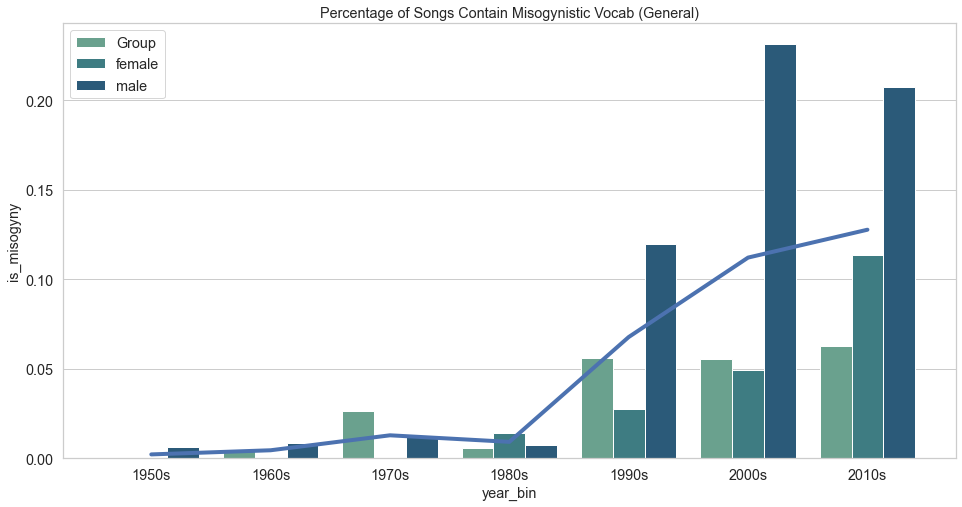

In [209]:
is_misogyny_grouped = pd.DataFrame(music_df.groupby(['year_bin', 'Gender']).is_misogyny.mean())
is_misogyny_grouped.reset_index(inplace = True)
is_misogyny_grouped_hiphop = pd.DataFrame(hiphop.groupby(['year_bin', 'Gender']).is_misogyny.mean())
is_misogyny_grouped_hiphop.reset_index(inplace = True)
is_misogyny_grouped_hiphop['Gender'] = is_misogyny_grouped_hiphop['Gender'].apply(lambda x: x + "_hiphop")
year_mean = is_misogyny_grouped.groupby('year_bin').mean().reset_index()
year_mean_hiphop = is_misogyny_grouped_hiphop.groupby('year_bin').mean().reset_index()
sns.barplot(x = 'year_bin', y= 'is_misogyny', hue = 'Gender', data = is_misogyny_grouped_hiphop, palette = "flare").set_title("Percentage of Songs Contain Misogynistic Vocab (Hip Hop)")
sns.lineplot(x = 'year_bin', y = 'is_misogyny', data = year_mean_hiphop)
plt.show()
sns.barplot(x = 'year_bin', y= 'is_misogyny', hue = 'Gender', data = is_misogyny_grouped, palette = "crest").set_title("Percentage of Songs Contain Misogynistic Vocab (General)")
sns.lineplot(x = 'year_bin', y = 'is_misogyny', data = year_mean)
plt.show()

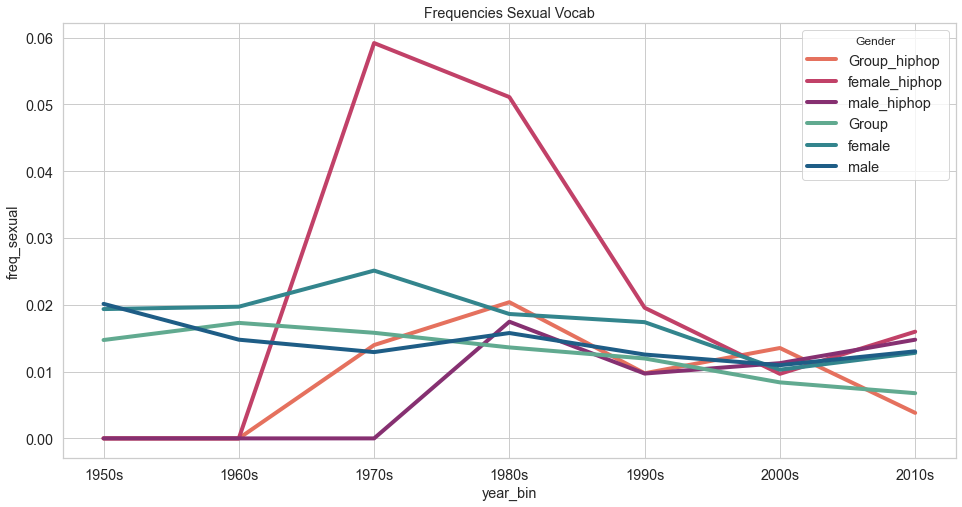

<Figure size 1152x576 with 0 Axes>

In [129]:
sexual_grouped = pd.DataFrame(music_df.groupby(['year_bin', 'Gender']).freq_sexual.mean())
sexual_grouped.reset_index(inplace = True)
sexual_grouped_hiphop = pd.DataFrame(hiphop.groupby(['year_bin', 'Gender']).freq_sexual.mean())
sexual_grouped_hiphop.reset_index(inplace = True)
row = pd.DataFrame([['1960s', 'Group_hiphop', 0], ['1960s', 'female_hiphop', 0], ['1960s', 'male_hiphop', 0], 
                    ['1950s', 'Group_hiphop', 0], ['1950s', 'female_hiphop', 0], ['1950s', 'male_hiphop', 0]],
                  columns = ['year_bin', 'Gender', 'freq_sexual'])
sexual_grouped_hiphop['Gender'] = sexual_grouped_hiphop['Gender'].apply(lambda x: x + "_hiphop") 
sexual_grouped_hiphop = sexual_grouped_hiphop.append(row).sort_values(by = ['year_bin', 'Gender'])
sns.color_palette("Set2")
ax = sns.lineplot(x = 'year_bin', y= 'freq_sexual', hue = 'Gender', data = sexual_grouped_hiphop, palette = "flare")
sns.lineplot(x = 'year_bin', y= 'freq_sexual', hue = 'Gender', data = sexual_grouped, ax = ax, palette = "crest").set_title("Frequencies Sexual Vocab")
plt.show()
plt.savefig('sexual_vocab.png')

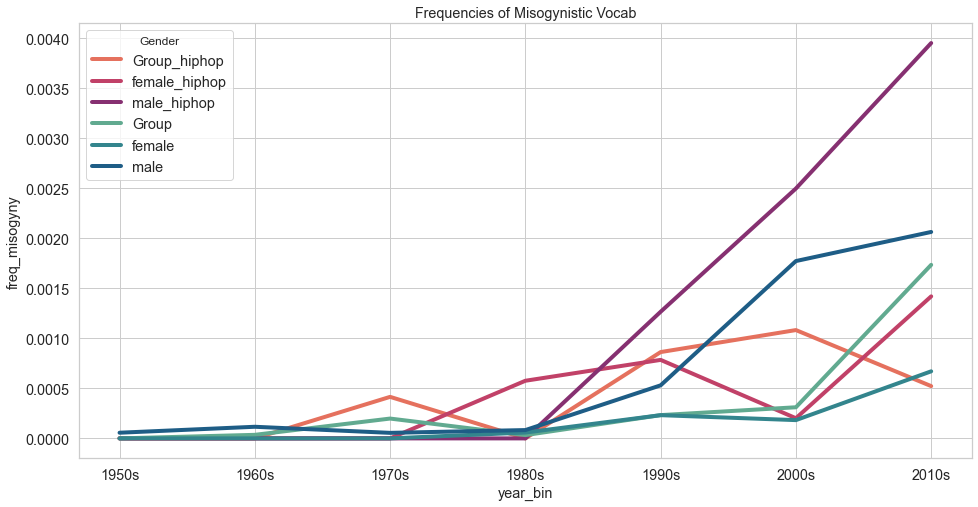

<Figure size 1152x576 with 0 Axes>

In [210]:
misogyny_grouped = pd.DataFrame(music_df.groupby(['year_bin', 'Gender']).freq_misogyny.mean())
misogyny_grouped.reset_index(inplace = True)
misogyny_grouped_hiphop = pd.DataFrame(hiphop.groupby(['year_bin', 'Gender']).freq_misogyny.mean())
misogyny_grouped_hiphop.reset_index(inplace = True)
row = pd.DataFrame([['1960s', 'Group_hiphop', 0], ['1960s', 'female_hiphop', 0], ['1960s', 'male_hiphop', 0], 
                    ['1950s', 'Group_hiphop', 0], ['1950s', 'female_hiphop', 0], ['1950s', 'male_hiphop', 0]],
                  columns = ['year_bin', 'Gender', 'freq_misogyny'])
misogyny_grouped_hiphop['Gender'] = misogyny_grouped_hiphop['Gender'].apply(lambda x: x + "_hiphop") 
misogyny_grouped_hiphop = misogyny_grouped_hiphop.append(row).sort_values(by = ['year_bin', 'Gender'])
sns.color_palette("Set2")
ax = sns.lineplot(x = 'year_bin', y= 'freq_misogyny', hue = 'Gender', data = misogyny_grouped_hiphop, palette = "flare")
sns.lineplot(x = 'year_bin', y= 'freq_misogyny', hue = 'Gender', data = misogyny_grouped, ax = ax, palette = "crest").set_title("Frequencies of Misogynistic Vocab")
plt.show()
plt.savefig('misogyny.png')

In [144]:
#check why hip hop songs in the 70s and 80s are missing from misogyny plot- missing or just don't contain?
hiphop.loc[(hiphop['year_bin'] == '1970s')& (hiphop['Gender'] == 'male')] #only two songs
hiphop.loc[(hiphop['year_bin'] == '1970s')& (hiphop['Gender'] == 'female')]

,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,cluster,Gender,tag,hiphop,freq_sexual,freq_shehe,freq_misogyny,freq_i,is_sexual,is_misogyny
1286,"Shame\nBurning, you keep my whole body yearnin...",255.6,0.169,1978,4.0,100.24,220,40,Shame,0.5,...,NaN,female,['hip hop rnb and dance hall'],True,0.025751,0.0,0.0,0.103004,True,False
1362,What you find-ah\nWhat you feel now\nWhat you ...,163.8,0.290,1979,3.6,109.72,153,34,Got To Be Real,-1.0,...,String Lover,female,"['boogie', 'contemporary r&b', 'disco', 'funk'...",True,0.092593,0.0,0.0,0.098765,True,False


Using Language Inquiry Word Count (LIWC) 2007 dictionary, I compute the percentage of songs that contain explicit sexual words in each decade, as well as the relative frequency of sexual words in each song. The LIWC dictionary is a theory-based approach to categorize words according to their psychometric properties and linguistic processes (Booth et al., 2007). It is an effective tool for text analysis that is tested for internal and external validity. 

Overall, 70% of the songs in the database used sexual vocabularies in their lyrics and the percentage remains pretty stable over the six decades. However, we see that until the 1990s, female artists have a higher percentage of songs that contain sexualized lyrics. Since 2000, male artists surpass female artists to have a higher ratio of sexualized songs in the chart. This pattern is also evident in songs that are tagged hip-hop. In the 70s and 80s, all hip-hop songs by female artists on Billboard Top 100 contain sexualized lyrics and the percentage went down since the 90s.In addition to measuring the percentage of songs that use sexual words in each decade, I also calculate the relative frequencies of sexual words used in each song in the plot titled “Frequency of the Use of Sexual Vocab”. We can see that, in general, songs by female hip-hop artists contain the highest frequencies of sexual vocabularies. The number peaked in the 70s and decreased significantly going into the 90s. Looking at the hip-hop genre alone, surprisingly, male artists tend to use sexual words less frequently than female or group artists. Although male artists have a higher percentage of songs on Billboard that use sexual vocabularies, female artists use them more often in their lyrics. 

In similar ways, I also quantify sexist slurs used in the lyrics. To define and generate a list of misogynistic words, I combined the words used in two previous studies on similar subjects (Quek & Dipolog-Ubanan, 2017; Felmlee et al., 2019). I find out that not only did the numbers of Billboard songs that contain sexist slurs rise remarkably over time, but also did the frequencies of these words used in these songs. On average, the percentage of songs on Billboard Top 100 that contain misogynistic words has been steadily increasing after ballooned in the 90s, driven by a significant increase among male hip hop artists. Between 2010 and 2015, nearly 15% of Billboard Top 100 songs contain misogynistic words. In particular, female hip hop artists use misogynistic words more frequently than any groups in the 1980s, followed by a rapid and continued growth in the following decades. In the plot Frequencies of Misogynistic Vocab, we can see that male hip hop artists indeed lead the frequent use of misogyny in their lyrics. However, we also see that artists regardless of genres or gender categories expanded their use of misogynistic words since the 2000s. 
Importantly, the increased use of misogynistic words was the most salient among hip hop songs by female artists first, before male hip hop artists and the general popular music started to adopt the trend and eventually dominated the production of these vocabularies. It suggests that the words we view as misogynistic by conventions might carry different meanings from their original use. To put it in a Peircean semiotic way, the legisign of misogyny words seems to have begotten a new legisign with a different interpretant, as the cultural groups to which they belong changed. We can suspect that the sign of misogyny in music lyrics was first originated among female hip hop artists and maintained through the replication of these words amongst other artists of different genres and genders. In this case, the object and interpretant of the sign might have changed as well, as the new sign is capable of creating new conventions.

However, changes in the producer of the signs don’t necessarily lead to a shift in interpretant and cultural convention (the legisign) among an audience. In other words, female artists may use sexist slurs in their music the same way as the male artists who followed. To empirically test whether the meanings of the sexist slurs have been altered as male artists adopted and controlled the production of legisign, we have to move beyond simple counting and aggregation of incidents of sexist slurs into analyzing the context of their uses. To do this, I calculated the term frequency-inverse document frequency (TFIDF) of lyrics that contain misogynistic slurs and plotted the top 15 words/bigrams for both male and female artists. TFIDF of a word is the multiplication of the times a word appears in a document and the inverse document frequency of the word across a set of documents. It is a useful statistic to represent the relevance of a word across all documents. By examining the TFIDF, I hope to see the important words used in the lyrics to understand the main messages being conveyed. For songs with misogynistic words, I find out that there are clear differences and similarities in the sentiments and content of keywords between male and female artists. Top words/bigrams generated from songs by male artists are heavily sexual (e.g. “sensual seduction”, “night move”, “make body”) and gendered (eg. “chick bad”, “like daddy”). Top words/bigrams by female artists are also sexual (eg. “look butt”, “hotter”) and gendered, but they convey a sense of power and aggression that is not seen in the words for male artists(eg. “girl wan[t]”, “oh shit”, “[do]n’t care”, “unity”, “high motherfucker”).

These distinctions between top words from misogyny lyrics by male and female artists imply that the attitudes and narratives of their songs are, in fact, different. It supports the argument that female artists may be using misogynistic vocabularies differently than their male counterparts. The keywords by female artists also suggest that the lyrics express confidence and assertion in a male-dominated space. In this case, the object of the sign is no longer “misogyny” but has a positive meaning of “empowerment”. The interpretant is that using misogynistic words is empowering. Additionally, the similarities between the songs with sexist slurs show that there is a collective awareness of the gendered sexual environment. All the evidence above indicate that male artists modified the cultural convention of misogynistic words from female empowerment to sexual objectification, which is now the cultural convention understood by the majority of western society.

In [199]:
#tfidf of songs by female and male artists
import nlp
sexual = music_df.loc[music_df['is_sexual']]
misogyny = music_df.loc[music_df['is_misogyny']]
#sexual 2782 songs
#misogyny 231

In [183]:
#create lemmas
#lemmas = sexual.loc[sexual['Gender'] == 'female']['lyrics'].apply(nlp.get_lemmas)
#lemmas.to_pickle('sexual_lemmas_f.pkl')
#lemmas = sexual.loc[sexual['Gender'] == 'male']['lyrics'].apply(nlp.get_lemmas)
#lemmas.to_pickle('sexual_lemmas_m.pkl')

In [184]:
#lemmas = misogyny.loc[misogyny['Gender'] == 'female']['lyrics'].apply(nlp.get_lemmas)
#lemmas.to_pickle('misogyny_lemmas_f.pkl')
#lemmas = misogyny.loc[misogyny['Gender'] == 'male']['lyrics'].apply(nlp.get_lemmas)
#lemmas.to_pickle('misogyny_lemmas_m.pkl')

In [188]:
def plot_top_lemmas(lemmas, data_description, n = 20):
    # Extend list so that it contains all words/parts of speech for all the captions
    lemmas_full = []
    for i in lemmas:
        lemmas_full.extend(i)

    nltk.FreqDist(lemmas_full).plot(n, title='Top 10 Lemmas Overall for ' + data_description);
    return

def plot_top_tfidf(lemmas, data_description, n = 15):    
    # Initialize Series of lemmas as Gensim Dictionary for further processing
    dictionary = corpora.Dictionary([i for i in lemmas])

    # Convert dictionary into bag of words format: list of (token_id, token_count) tuples
    bow_corpus = [dictionary.doc2bow(text) for text in lemmas]
    
    # Calculate TFIDF based on bag of words counts for each token and return weights:
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_weights = {}
    for doc in tfidf[bow_corpus]:
        for ID, freq in doc:
            tfidf_weights[dictionary[ID]] = np.around(freq, decimals = 2)

    # highest TF-IDF values:
    top_n = pd.Series(tfidf_weights).nlargest(n)
    
    # Plot the top 10 weighted words:
    plt.plot(top_n.index, top_n.values)
    plt.xticks(rotation='vertical')
    plt.title('Top {} Lemmas (TFIDF) for '.format(n) + data_description);
    
    return

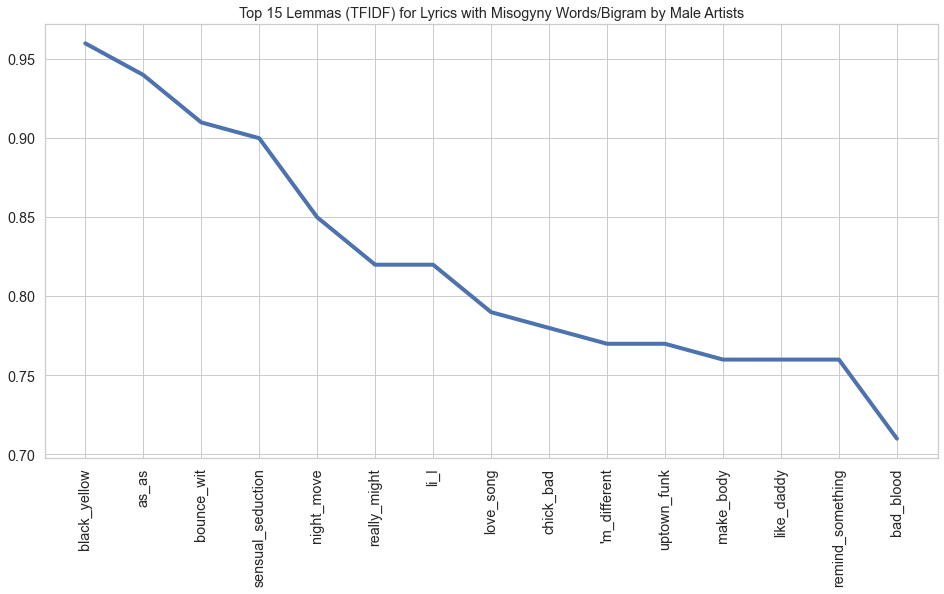

In [196]:
m_lemmas_m= pd.read_pickle('misogyny_lemmas_m.pkl')
m_bigram_m = models.Phrases(m_lemmas_m, min_count=5)
m_bigram_mod_m = models.phrases.Phraser(m_bigram_m)

def m_make_bigrams_m(texts):
    '''
    Make bigrams for words within a given document
    '''
    return [m_bigram_mod_m[doc] for doc in texts]

m_lemmas_m = m_make_bigrams_m(m_lemmas_m)
plot_top_tfidf(m_lemmas_m, 'Lyrics with Misogyny Words/Bigram by Male Artists')

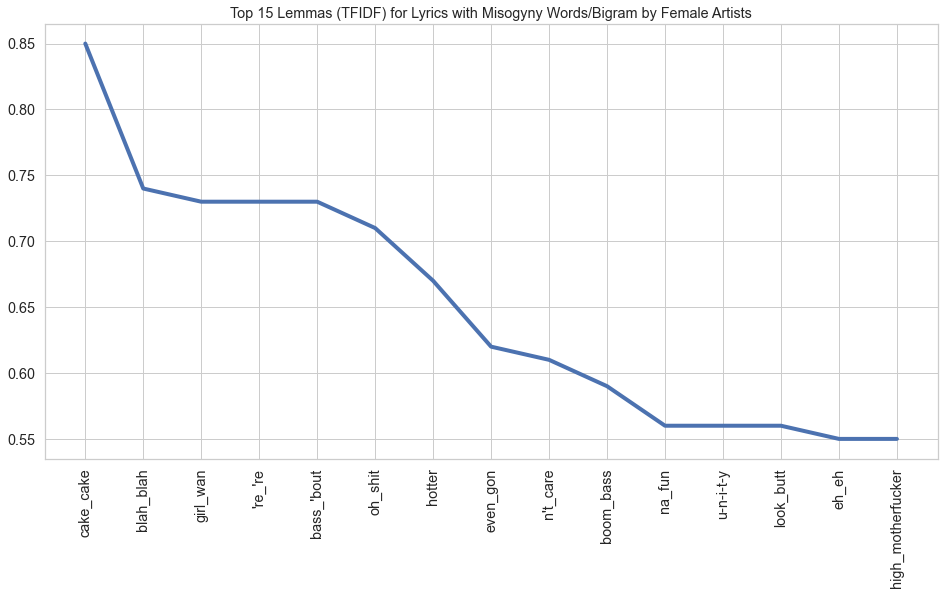

In [212]:
m_lemmas_f= pd.read_pickle('misogyny_lemmas_f.pkl')
m_bigram_f = models.Phrases(m_lemmas_f, min_count=5)
m_bigram_mod_f = models.phrases.Phraser(m_bigram_f)

def m_make_bigrams_f(texts):
    '''
    Make bigrams for words within a given document
    '''
    return [m_bigram_mod_f[doc] for doc in texts]

m_lemmas_f = m_make_bigrams_f(m_lemmas_f)
plot_top_tfidf(m_lemmas_f, 'Lyrics with Misogyny Words/Bigram by Female Artists')

To conclude, analyzing over 4000 Billboard Top 100 songs from 1950 – 2015, I find that there’s a clear trend of increasing sexualization accompanied by the soaring use of misogynistic slurs in popular music. This confirms that sexualization and misogyny in popular music lyrics are replicas of legisigns. It also agrees with previous research that popular music is becoming more sexual and that misogyny is becoming more prevalent over time. Moreover, I also discover that sexual slurs carry different meanings for female and male artists. There is evidence that female artists may have started the trend of using these words in lyrics. Based on TDIFD analysis, female artists use misogynistic words more positively, suggesting that some find the slurs empowering or gratifying. This is also confirmed by a previous study that finds female rappers often reinforcing sexual stereotypes in their lyrics (Weitzer & Kubrin, 2009). Despite the potentially uplifting use of sexist slurs, the popularity of these vocabularies in popular music can still be harmful to gender equality. Ezzll et al. (2009) argue that the women who “reclaim” sexist words unwittingly reinforce sexism and that trivializing the negative connotation of misogynistic expression is only gives a “false power”. They point out that the prevalence of sexist slurs only desensitizes people to their harm. False empowerment from using sexist vocabularies masks the powerless reality that doesn’t go away with the normalization of derogatory words against the oppressed group. In this case, the popularization of misogynistic words in music lyrics could still have a negative effect in dismantling gendered stereotypes and inequity in society. Whether one feels empowered or not is a person feeling subject to social norms as well as personal values and experiences. Nonetheless, the perceived empowerment doesn’t change the dangerous and sexist realities for most. As music plays such an important role in forming social values and conventions, it is important to unpack the trends of how historically oppressed groups are misrepresented which is also reflected in the ways they represent themselves.

References 

American Psychological Association, Task Force on the Sexualization of Popular Music. (2016). Report of the Divdision 46 Task Fource on the sexualization of popular music. Retrieved from https://www.apadivisions.org/division-46/publications/popular-music-sexualization.pdf

Buchler, J. (1956). The philosophy of Peirce. London: Routledge & Kegan Paul.  

Cougar Hall, P., West, J. H., & Hill, S. (2011). Sexualization in lyrics of popular music from 1959 to 2009: Implications for Sexuality Educators. Sexuality & Culture, 16(2), 103-117. doi:10.1007/s12119-011-9103-4

Chrysalis L. Wright & Mark Rubin (2017) “Get lucky!” Sexual content in music lyrics, videos and social media and sexual cognitions and risk among emerging adults in the USA and Australia, Sex Education, 17:1, 41-56, DOI: 10.1080/14681811.2016.1242402

Ezzell M., Frost, A. & Kleinman, S. (2009). Reclaiming Critical Analysis: The Social Harms of ‘Bitch.’ Sociological Analysis, vol. 3, no. 1, 2009.

Felmlee, D., Inara Rodis, P. & Zhang, A (2020). Sexist Slurs: Reinforcing Feminine Stereotypes Online. Sex Roles 83, 16–28 https://doi.org/10.1007/s11199-019-01095-z

Gay, P. D. (2013). Doing cultural studies: The story of the Sony Walkman. Los Angeles Calif., etc.: Sage.

Grabe, S., & Hyde, J. S. (2009). Body objectification, MTV, and PSYCHOLOGICAL outcomes among Female Adolescents1. Journal of Applied Social Psychology, 39(12), 2840-2858. doi:10.1111/j.1559-1816.2009.00552.x

Gill, R. (2003) From sexual objectification to sexual subjectification: the resexualisation of women's bodies in the media. Feminist Media Studies, 3 (1). pp. 100-106. ISSN 1468-0777

McRobbie, A. (2004). Post‐feminism and popular culture. Feminist Media Studies, 4(3), 255-264. doi:10.1080/1468077042000309937

Pennebaker,, J. W., Chung, C. K., Ireland, M., Gonzales, A., & Booth, R. J. (2007). The Development and Psychometric Properties of LIWC2007. LIWC2007 Manual, (4).

Quek, Justine & Dipolog-Ubanan, Genevieve. (2017). Misogyny in the Lyrics of Billboard's Top Rap Airplay Artists. International Journal of Arts Humanities and Social Sciences. 2. 7-13.

van Oosten, J. M. F., Peter, J., & Valkenburg, P. M. (2015). The Influence of Sexual Music Videos on Adolescents’ Misogynistic Beliefs: The Role of Video Content, Gender, and Affective Engagement. Communication Research, 42(7), 986–1008. https://doi.org/10.1177/0093650214565893

Weitzer, R., & Kubrin, C. E. (2009). Misogyny in rap music. Men and Masculinities, 12(1), 3-29. doi:10.1177/1097184x08327696